In [ ]:
import time
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
from wordcloud import WordCloud
%matplotlib inline

In [30]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [2]:
def date_to_timestamp():
    ts = str(time.time()*1000)
    ts = int(ts[:13])
    return ts

In [3]:
date_to_timestamp()

1573309446475

In [7]:
timeStamp = int(str(1573309446475)[:10])
timeArray = time.localtime(timeStamp)
otherStyleTime = time.strftime("%Y-%m-%d %H:%M:%S",timeArray)
otherStyleTime

'2019-11-09 22:24:06'

# 近一年全球震级级别最高 Top10

In [1]:
# 设置表头
columns = ['CATA_ID','Magnitude','Earthquake_Time','Latitude','Longitude','Depth','Earthquake_Location','Url']
df = pd.read_csv('./data/最近一年世界地震情况.csv',encoding='utf-8',header=None,names=columns)

# 按得分降序排列
df_score = df.sort_values('Magnitude',ascending=False)
# df.info

# x轴坐标
loc = df_score.Earthquake_Location[:10]
print(loc)
# y轴坐标
m = df_score.Magnitude[:10]
# print(loc,m)

# 绘制条形图，用range()能保持x轴顺序
plt.bar(range(10),m,tick_label=loc)

# 设置纵坐标轴范围
plt.ylim((1,10))

# 设置标题
plt.title("近一年全球震级级别最高 Top10",color='red')

# 设置x，y轴标题
plt.xlabel('地震具体位置',color='red')
plt.ylabel('地震级别',color='red')

# 为每个图形添加数值标签
for x,y in enumerate(list(m)):
    plt.text(x,y+0.2,"%s" % round(y,1),ha='center')

# x轴名字太长发生重叠，旋转为纵向显示
plt.xticks(rotation=290)

# 自动控制空白边缘，以全部显示X轴名称
plt.tight_layout()

plt.show()

NameError: name 'pd' is not defined

# 近一年全球每月发生地震次数排名

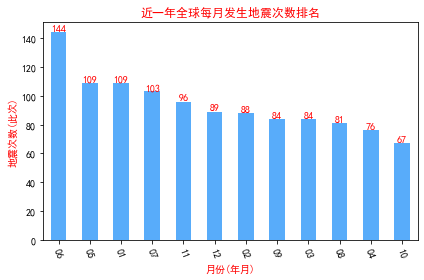

In [48]:
# 数据读取
df = pd.read_csv('./data/最近一年世界地震情况.csv',encoding='utf-8',header=None,names=columns)
# 从日期中提取月份
df['Earthquake_Time']=df['Earthquake_Time'].map(lambda x:x.split('-')[1])

# 统计各月发生地震次数
grouped_month = df.groupby('Earthquake_Time')
grouped_month_amount = grouped_month.Earthquake_Time.count()

# 按降序排列
top_month = grouped_month_amount.sort_values(ascending=False)


# 绘制条形图，用range()能保持x轴顺序
top_month.plot(kind='bar',color='#58ACFA')

# 设置标题
plt.title("近一年全球每月发生地震次数排名",color='red')

# 设置x，y轴标题
plt.xlabel('月份(年月)',color='red')
plt.ylabel('地震次数(此次)',color='red')

# 为每个图形添加数值标签
for x,y in enumerate(list(top_month.values)):
    plt.text(x,y+0.8,"%s" % round(y,1),ha='center',color='red')

# x轴名字太长发生重叠，旋转为纵向显示
plt.xticks(rotation=290)

# 自动控制空白边缘，以全部显示X轴名称
plt.tight_layout()

plt.show()

# 统计近一年中同一地方发生地震的次数

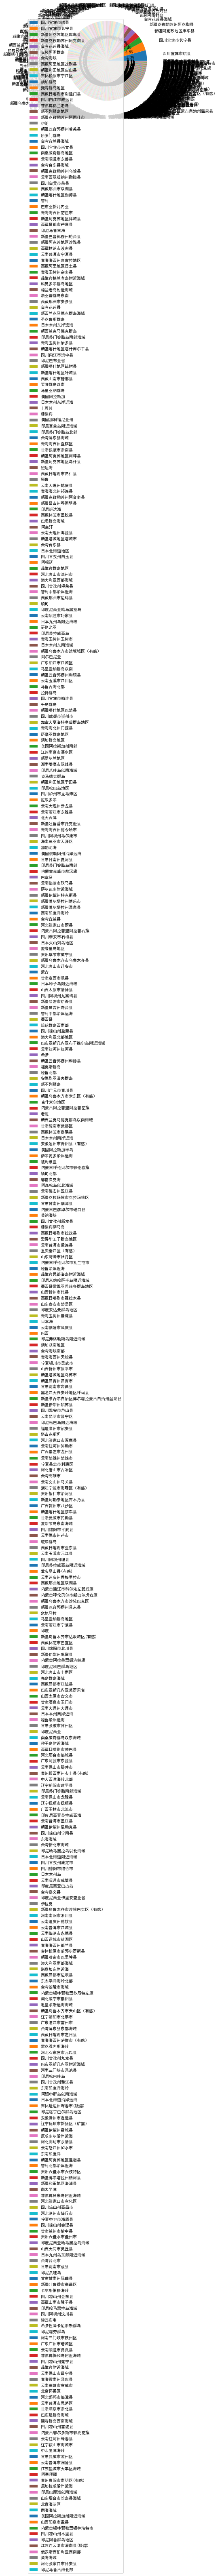

In [56]:
# 读取数据
df = pd.read_csv('./data/最近一年世界地震情况.csv',encoding='utf-8',header=None,names=columns)

count = df['Earthquake_Location'].value_counts()
plt.pie(count,labels=count.keys(),labeldistance=1.4,autopct='%2.1f%%')

plt.axis('equal')

plt.legend(loc='upper left',bbox_to_anchor=(-0.1,1))

plt.show()

# 统计近一年地震级别高低具体的次数

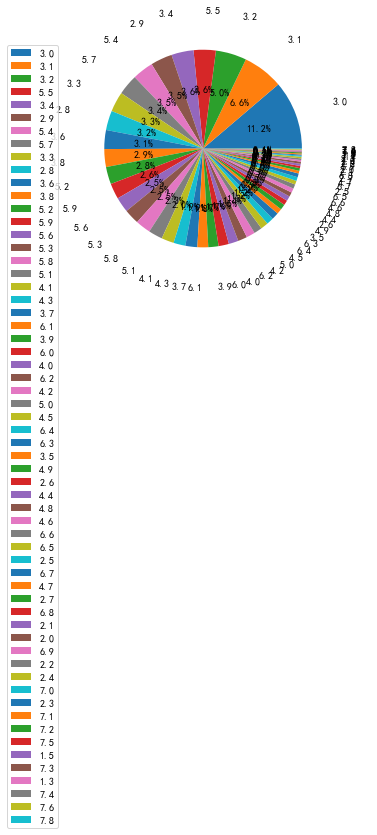

In [58]:
# 读取数据
df = pd.read_csv('./data/最近一年世界地震情况.csv',encoding='utf-8',header=None,names=columns)
count = df['Magnitude'].value_counts()
plt.pie(count,labels=count.keys(),labeldistance=1.4,autopct='%2.1f%%')

plt.axis('equal')

plt.legend(loc='upper left',bbox_to_anchor=(-0.1,1))

plt.show()

# 制作近一年地震高频地区词云分析图

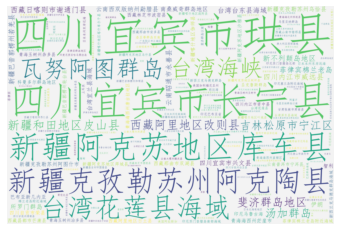

In [67]:
# 读取数据
df = pd.read_csv('./data/最近一年世界地震情况.csv',encoding='utf-8',header=None,names=columns)
df = df.groupby(by='Earthquake_Location').count()
df = df['Magnitude'].sort_values(ascending=False)
font_path = 'simfang.ttf'

wordcloud = WordCloud(
    background_color ='#F3F3F3',
    font_path = font_path,
    width=1200,
    height=800,
    margin=2,
    max_font_size=200,
    random_state=42,
    scale=2,
    colormap='viridis',
)

wordcloud.fit_words(df)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()